<a href="https://colab.research.google.com/github/ArifAygun/CustomerEye/blob/main/Analysis_Freedom_Debt_Relief_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS OF FREEDOM DEPT RELIEF COMPANY**
# **REVIEWS IN TRUSTPILOT WEBSITE**

#### IMPORT LIBRARIES AND DATASET

In [ ]:
!pip install wordcloud
!pip install pycountry
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
# import pycountry



from wordcloud import WordCloud
from collections import Counter

import emoji

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim import corpora, models
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Freedom Debt Relief/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Freedom Debt Relief


In [ ]:
df= pd.read_csv('Freedom_Debt_Relief2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33454 entries, 0 to 33453
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Reviewer Name              33454 non-null  object
 1   Reviews Count              33454 non-null  int64 
 2   Country Code               33454 non-null  object
 3   Experience Date            33454 non-null  object
 4   Rating                     33454 non-null  int64 
 5   Review Date                33454 non-null  object
 6   Review Title               33454 non-null  object
 7   Review Text                33454 non-null  object
 8   Reply Date                 31901 non-null  object
 9   Reply Text                 32135 non-null  object
 10  Country Name               33454 non-null  object
 11  Year                       33454 non-null  int64 
 12  Review Year                33454 non-null  int64 
 13  Review Response            33454 non-null  object
 14  Reply 

## NLP

In [ ]:
# Count the number of items in each text item
df['Text_Item_Count'] = df['Cleaned_Concatenated_Text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

# Display both the text and the count of text items
text_with_count = df[['Cleaned_Concatenated_Text', 'Text_Item_Count']]

print(text_with_count)

# Calculate the total number of text items across all rows
total_text_items = df['Text_Item_Count'].sum()

# Display the total number of text items
print(f"Total Text Items: {total_text_items}")

                               Cleaned_Concatenated_Text  Text_Item_Count
0              polite kind polite kind asked immediately                6
1      great customer service long wait time represen...               20
2      needed answer needed answer question concernin...               17
3            question got answer right away professional                6
4      company charge company charge outrageous settl...               73
...                                                  ...              ...
33449  repayment hello reason giving fdr 1 star lates...               23
33450  glad working freedom helping debt starting dig...               17
33451  finally able take deep finally able take deep ...               11
33452  disappointed md recently wanted add old collec...               47
33453  best costumer service ever best costumer servi...               14

[33454 rows x 2 columns]
Total Text Items: 625407


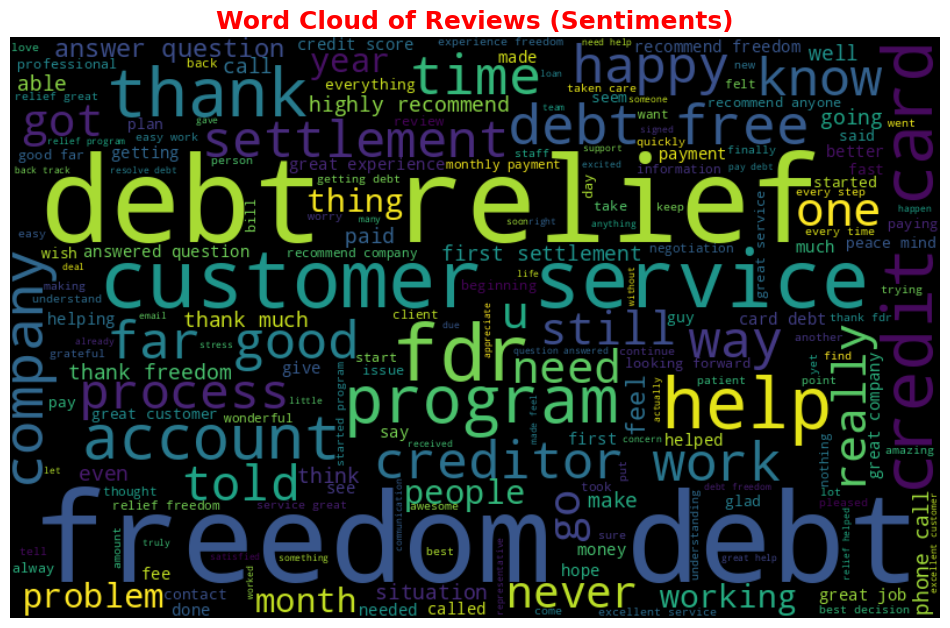

freedom debt: 1.0
debt relief: 0.9222702702702703
customer service: 0.31686486486486487
fdr: 0.296972972972973
help: 0.24151351351351352
credit card: 0.22756756756756757
thank: 0.22064864864864864
program: 0.2091891891891892
account: 0.18583783783783783
company: 0.15978378378378377
debt free: 0.15632432432432433
time: 0.14681081081081082
work: 0.14367567567567568
far good: 0.13827027027027028
know: 0.1362162162162162
way: 0.13556756756756758
happy: 0.13275675675675674
creditor: 0.1321081081081081
settlement: 0.12983783783783784
process: 0.1225945945945946
told: 0.11772972972972973
one: 0.1148108108108108
really: 0.10724324324324325
u: 0.10281081081081081
need: 0.10248648648648649
got: 0.10183783783783784
go: 0.09956756756756757
still: 0.0988108108108108
never: 0.0934054054054054
problem: 0.09124324324324325


In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=500).generate(' '.join(df['Cleaned_Concatenated_Text'].dropna()))

# Sort the word cloud in descending order
sorted_wordcloud = dict(sorted(wordcloud.words_.items(), key=lambda item: item[1], reverse=True))

# Get the top 30 results
top_30 = dict(list(sorted_wordcloud.items())[:30])

# Create a figure with the specified title
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Set the title with custom font size and weight
plt.title('Word Cloud of Reviews (Sentiments)', fontsize=18, fontweight='bold', color='red')

# Show the word cloud
plt.show()

# Print the top 30 words as text output
for word, frequency in top_30.items():
    print(f'{word}: {frequency}')

Key Insights from Word Cloud for Freedom Debt Relief:

Central Themes: "Freedom Debt Relief" is central and highly relevant, emphasizing its significance in discussions.

Customer Service: Variability in customer service experiences is indicated, with a focus on the company's interactions with customers.

Positive Sentiments: Positive expressions like "thank" and "happy" are apparent, reflecting positive experiences with Freedom Debt Relief.

Financial Terminology: Common financial terms, such as "program," "account," and "settlement," are frequently mentioned, underlining financial aspects.

Diverse Experiences: Discussions encompass a wide range of experiences, including challenges and problem-solving related to the company's services.

Aspiration for Freedom: "Freedom" and "debt-free" reflect the desire for financial freedom and reduced debt, which aligns with the company's mission.

This word cloud analysis offers insights into the key themes, emotions, and financial aspects associated with discussions about Freedom Debt Relief, highlighting its central role in customer experiences and aspirations for financial freedom.

In [ ]:
from collections import Counter

# Concatenate and split the text, handling NaN values
all_words = ' '.join(str(text) for text in df['Cleaned_Concatenated_Text'] if pd.notna(text)).split()

# Count the occurrences of each word
word_counts = Counter(all_words)

# Sort the word counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame for the first 30 most common words
word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

print(word_counts_df.head(30))

          Word  Count
0         debt  23378
1      freedom  13691
2       relief  10538
3        great   8498
4         help   7257
5          fdr   6861
6      service   6251
7      helpful   6215
8      program   6158
9        would   6005
10         far   5740
11       thank   5637
12         get   5417
13     company   5280
14        good   5257
15      credit   4511
16        time   4406
17     account   4047
18         one   3948
19        work   3861
20    question   3684
21     process   3543
22    customer   3536
23        call   3528
24  settlement   3483
25       happy   3475
26  experience   3423
27   recommend   3242
28       month   3203
29        made   3197


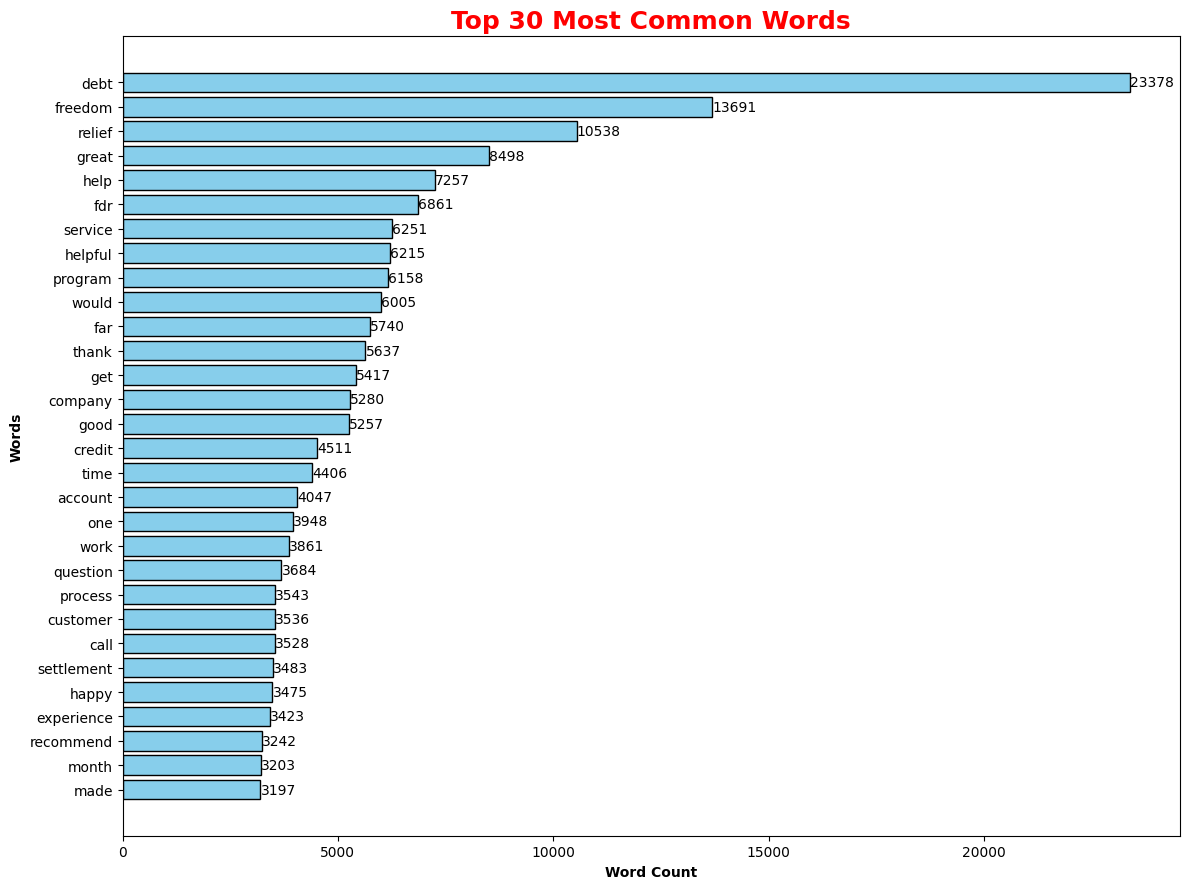

In [ ]:
top_n = 30
top_words = list(sorted_word_counts.keys())[:top_n]
top_word_counts = list(sorted_word_counts.values())[:top_n]

# Choose a color for the bar chart
bar_color = 'skyblue'

# Create a horizontal bar chart with better readability
plt.figure(figsize=(12, 9))
bars = plt.barh(top_words, top_word_counts, color=bar_color, edgecolor='black', height=0.8)

# Add data values on each bar
for bar, count in zip(bars, top_word_counts):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10, color='black')

# Set axis labels and invert the y-axis for better readability
plt.xlabel('Word Count', fontweight='bold')
plt.ylabel('Words', fontweight='bold')
plt.gca().invert_yaxis()

# Add a title with specified properties
plt.title('Top 30 Most Common Words', fontsize=18, fontweight='bold', color='red')

# Show the plot
plt.tight_layout()
plt.show()

### Sentiment Analysis

Sentiment analysis helps determine the sentiment (positive, negative, or neutral) of text data. VADER or TextBlob libraries for sentiment analysis were used


Analyzing the relationship between Ratings and Review Text can involve sentiment analysis to derive a sentiment score from the text and see if it aligns with the given Ratings.
Here's a step-by-step guide on how you can do this:

#### 1. Sentiment Analysis:
You can use a sentiment analysis tool or library to analyze the sentiment of the review text. There are various sentiment analysis libraries available in Python, such as NLTK, TextBlob, VADER, and spaCy. Choose one that you are comfortable with.



In [ ]:
def analyze_sentiment(Cleaned_Concatenated_Text):
    analysis = TextBlob(Cleaned_Concatenated_Text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

#### 2. Assign Sentiment Scores:
You can assign numerical sentiment scores to each review based on the sentiment analysis. For example, you might assign a score of 5 for 'positive,' 3 for 'neutral,' and 1 for 'negative.'

In [ ]:
def assign_sentiment_score(sentiment):
    if sentiment == 'positive':
        return 5
    elif sentiment == 'neutral':
        return 3
    else:
        return 1

#### 3. Calculate a New Rating:
Calculate a new rating for each review based on the sentiment score derived from the review text. You can simply average the sentiment scores from the reviews. This will give you a new rating for each review.

In [ ]:
def calculate_new_rating(sentiment_score):
    # You can customize this formula as needed
    return (sentiment_score * 5) / 3

#### 4.Compare Given and Calculated Ratings:
Once you have the calculated ratings, you can compare them with the given ratings to assess how well the sentiment analysis aligns with the reviewer's direct ratings.

In [ ]:
def compare_ratings(given_rating, calculated_rating):
    # Calculate the difference between given and calculated ratings
    rating_difference = given_rating - calculated_rating
    return rating_difference


In [ ]:
def analyze_sentiment(Cleaned_Concatenated_Text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(Cleaned_Concatenated_Text)
    return sentiment_scores

In [ ]:
# Apply sentiment analysis to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Scores'] = df['Cleaned_Concatenated_Text'].apply(lambda x: analyze_sentiment(str(x)) if pd.notna(x) else {'compound': 0, 'neg': 0, 'neu': 0, 'pos': 0})

# Extract the sentiment labels (positive, negative, neutral)
df['Sentiment_Label'] = df['Sentiment_Scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

print("Sentiment Scores:")
print(df['Sentiment_Scores'])

print("\nSentiment Labels:")
print(df['Sentiment_Label'])


Sentiment Scores:
0        {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...
1        {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
2        {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.229, 'neu': 0.71, 'pos': 0.061, 'com...
                               ...                        
33449    {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
33450    {'neg': 0.179, 'neu': 0.394, 'pos': 0.427, 'co...
33451    {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'comp...
33452    {'neg': 0.112, 'neu': 0.741, 'pos': 0.146, 'co...
33453    {'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...
Name: Sentiment_Scores, Length: 33454, dtype: object

Sentiment Labels:
0        positive
1        positive
2        positive
3         neutral
4        negative
           ...   
33449    positive
33450    positive
33451    positive
33452    positive
33453    positive
Name: Sentiment_Label, Length: 33454, dtype: object


In [ ]:
# Extract 'neg', 'neu', 'pos', and 'comp' values into separate columns
df[['neg', 'neu', 'pos', 'comp']] = df['Sentiment_Scores'].apply(lambda x: pd.Series([x['neg'], x['neu'], x['pos'], x['compound']]))

# Display the updated DataFrame
print(df[['neg', 'neu', 'pos', 'comp']])

# Display the updated DataFrame
print("\nDataFrame with Additional Columns:")
print(df[['neg', 'neu', 'pos', 'comp']])

         neg    neu    pos    comp
0      0.000  0.370  0.630  0.7783
1      0.000  0.630  0.370  0.8750
2      0.000  0.829  0.171  0.5106
3      0.000  1.000  0.000  0.0000
4      0.229  0.710  0.061 -0.8934
...      ...    ...    ...     ...
33449  0.000  0.792  0.208  0.6124
33450  0.179  0.394  0.427  0.7845
33451  0.000  0.559  0.441  0.7964
33452  0.112  0.741  0.146  0.2263
33453  0.000  0.405  0.595  0.9403

[33454 rows x 4 columns]

DataFrame with Additional Columns:
         neg    neu    pos    comp
0      0.000  0.370  0.630  0.7783
1      0.000  0.630  0.370  0.8750
2      0.000  0.829  0.171  0.5106
3      0.000  1.000  0.000  0.0000
4      0.229  0.710  0.061 -0.8934
...      ...    ...    ...     ...
33449  0.000  0.792  0.208  0.6124
33450  0.179  0.394  0.427  0.7845
33451  0.000  0.559  0.441  0.7964
33452  0.112  0.741  0.146  0.2263
33453  0.000  0.405  0.595  0.9403

[33454 rows x 4 columns]


In [ ]:
df.sample(7).T

,175,22921,27532,1759,6905,30414,24177
Reviewer Name,Melinda Padfield,Linda,Heather Janicki,Michele Steele,Sandy Tremelling,CMJ,Don R
Reviews Count,1,3,1,1,1,5,1
Country Code,US,US,US,US,US,US,US
Experience Date,2019-11-21,2016-06-23,2018-06-03,2019-09-04,2022-11-04,2021-06-19,2014-11-07
Rating,4,4,5,5,5,5,5
Review Date,2019-11-21,2016-06-23,2018-06-03,2019-09-04,2022-11-04,2021-06-19,2014-11-07
Review Title,I’ve gotten one agreement so far,kohls,Fast and Friendly,Friendly and Professional!,Yes was happy to get one bill payoff,Rep was friendly and understanding and…,very helpful to my situation
Review Text,I’ve gotten one agreement so far. Still a long...,It felt good to have someone assist me with th...,Fast friendly service on getting me back on th...,Friendly and Professional! Everyone has been e...,Yes was happy to get one bill payoff! Thank yo...,Rep was friendly and understanding and I was a...,made everything easy for me all i have to do i...
Reply Date,2019-11-21,2020-08-13,2018-06-16,2019-09-05,2022-11-04,2021-06-21,NaN
Reply Text,"Hello, Melinda, thank you for your review! Our...","Linda, we're elated to hear about your experie...",Thank you for the helpful feedback regarding y...,"Thank you for your glowing review, Michele! We...","You're very welcome, Sandy! Hearing that our s...",Excellent feedback! We value our clients' tim...,NaN


Sentiment Label Counts and Percentages:
positive: Count = 29856, Percentage = 89.2%
negative: Count = 2386, Percentage = 7.1%
neutral: Count = 1212, Percentage = 3.6%


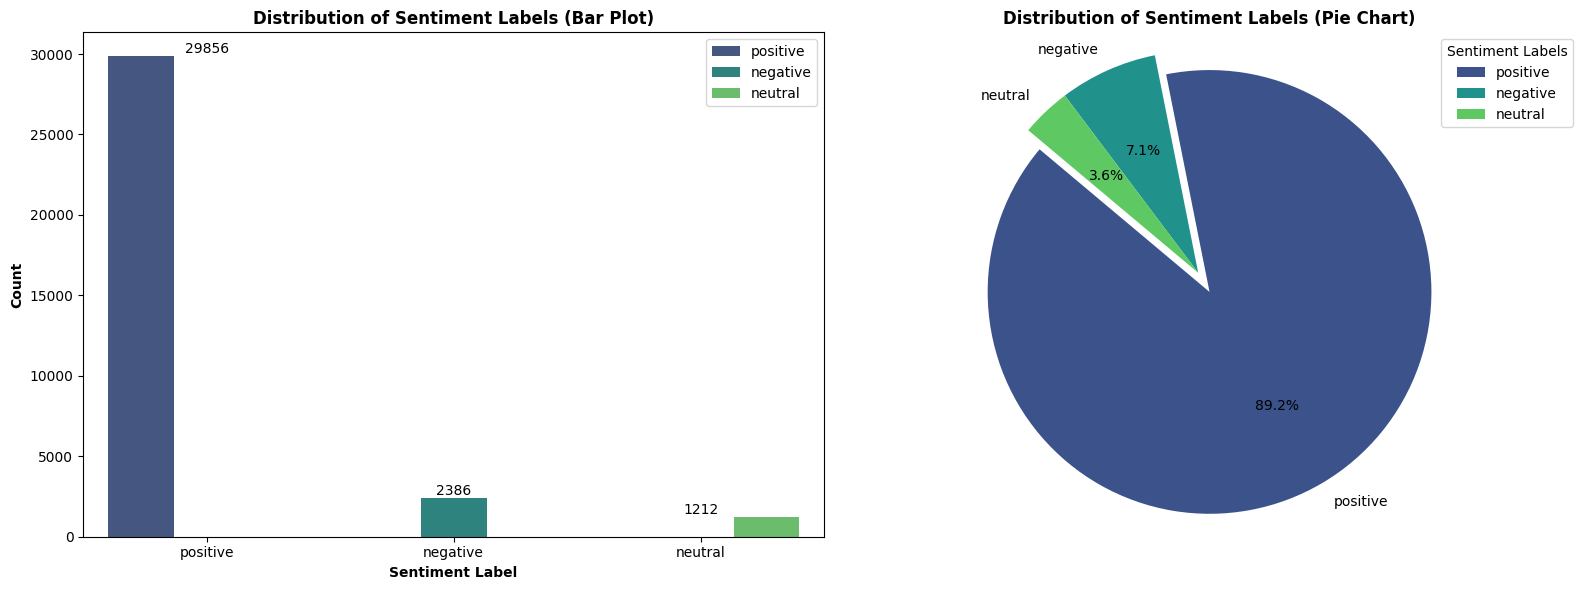

In [ ]:
# Get the counts of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create the bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', ax=ax1)
ax1.set_xlabel('Sentiment Label', weight='bold')
ax1.set_ylabel('Count', weight='bold')
ax1.set_title('Distribution of Sentiment Labels (Bar Plot)', fontsize=12, weight='bold')

for i, count in enumerate(sentiment_counts.values):
    ax1.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Create the pie chart with custom settings
colors = sns.color_palette('viridis', len(sentiment_counts))
explode = (0.1, 0, 0)  # Explode the 1st slice (positive sentiment)

# Create the pie chart
ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
ax2.set_title('Distribution of Sentiment Labels (Pie Chart)', fontsize=12, weight='bold')

# Add a legend
ax2.legend(sentiment_counts.index, title='Sentiment Labels', loc='upper right')

ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Print text output
print("Sentiment Label Counts and Percentages:")
total_count = sentiment_counts.sum()
for label, count in zip(sentiment_counts.index, sentiment_counts.values):
    percentage = (count / total_count) * 100
    print(f"{label}: Count = {count}, Percentage = {percentage:.1f}%")

plt.tight_layout()
plt.show()

### Seperating Sentiment Scores as Positive, Neutral and Negative Columns

In [ ]:
import ast

# Convert non-string values to string and replace single quotes with double quotes
df['Sentiment_Scores'] = df['Sentiment_Scores'].astype(str).str.replace("'", '"')

# Use ast.literal_eval to safely evaluate the literal expression, handling NaN values
def parse_sentiment_scores(x):
    try:
        return pd.Series(ast.literal_eval(x) if pd.notna(x) else {'neg': 0, 'neu': 0, 'pos': 0})
    except (SyntaxError, ValueError):
        return pd.Series({'neg': 0, 'neu': 0, 'pos': 0})

df[['Sentiment_Pos', 'Sentiment_Neu', 'Sentiment_Neg']] = df['Sentiment_Scores'].apply(parse_sentiment_scores)

# Display the updated DataFrame
print(df[['Sentiment_Pos', 'Sentiment_Neu', 'Sentiment_Neg']])


       Sentiment_Pos  Sentiment_Neu  Sentiment_Neg
0                  0              0              0
1                  0              0              0
2                  0              0              0
3                  0              0              0
4                  0              0              0
...              ...            ...            ...
33449              0              0              0
33450              0              0              0
33451              0              0              0
33452              0              0              0
33453              0              0              0

[33454 rows x 3 columns]


#### Topic Modeling

Topic modeling helps identify the main topics within a collection of documents. Latent Dirichlet Allocation (LDA) topic modeling using the Gensim library were used.

In [ ]:
# Replace NaN values with empty strings
df['Cleaned_Concatenated_Text'] = df['Cleaned_Concatenated_Text'].fillna('')

# Tokenize and preprocess text (using the 'Cleaned_Concatenated_Text' column)
tokenized_reviews = [word_tokenize(str(text)) for text in df['Cleaned_Concatenated_Text']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get topics and associated words
topics = lda_model.print_topics(num_words=5)

# Print the topics
for topic in topics:
    print(topic)


In [ ]:
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify reviews as positive, negative, or neutral
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Label'] = df['Cleaned_Concatenated_Text'].apply(classify_sentiment)

# Count the number of positive and negative reviews
positive_reviews_count = len(df[df['Sentiment_Label'] == 'Positive'])
negative_reviews_count = len(df[df['Sentiment_Label'] == 'Negative'])

# Create a pie chart to visualize the distribution of positive and negative reviews
labels = ['Positive', 'Negative']
sizes = [positive_reviews_count, negative_reviews_count]
colors = ['#4169E1', '#FF6666']  # Blue for positive, red for negative

plt.figure(figsize=(10, 8))

# Create a pie chart
plt.pie(sizes, colors=colors, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100),
        startangle=140, wedgeprops=dict(width=0.6))

# Set the font size and weight for the text
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['text.color'] = 'white'

plt.title('Sentiment Distribution of Reviews', fontsize=18, fontweight='bold', color='red')

legend = plt.legend(labels, loc='upper right')
for text in legend.get_texts():
    text.set_color('black')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Print text output
print("Sentiment Label Counts and Percentages:")
total_count = len(df)
positive_percentage = (positive_reviews_count / total_count) * 100
negative_percentage = (negative_reviews_count / total_count) * 100
print(f"Positive: Count = {positive_reviews_count}, Percentage = {positive_percentage:.1f}%")
print(f"Negative: Count = {negative_reviews_count}, Percentage = {negative_percentage:.1f}%")

plt.show()

#### Sentiment Trends Over Time

In [ ]:
# Convert the 'Review Date' column to a datetime object (if it's not already)
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group the data by quarter and sentiment label, and count the occurrences
sentiment_trends_quarterly = df.groupby([pd.Grouper(key='Review Date', freq='Q'), 'Sentiment_Label']).size().unstack(fill_value=0)

# Print text output for grouped values
print("Sentiment Trends Over Time (Quarterly):")
print(sentiment_trends_quarterly)

# Plot the sentiment trends over time (quarterly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends_quarterly, markers=True)
plt.title('Sentiment Trends Over Time (Quarterly)', weight='bold', fontsize=18, color='red')
plt.xlabel('Quarter', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
legend = plt.legend(title='Sentiment Label', loc='upper right')
for text in legend.get_texts():
    text.set_color('red')  # Set legend text color to red
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# Group the data by date and sentiment label, and count the occurrences
sentiment_trends = df.groupby(['Review Date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reset the index to have 'Date' as a column
sentiment_trends.reset_index(inplace=True)

# Set 'Date' column as the index for the DataFrame
sentiment_trends.set_index('Review Date', inplace=True)

# Filter the DataFrame for only the "Negative" sentiment label
negative_sentiment_trends = sentiment_trends['Negative']

In [ ]:
# Convert the 'Review Date' column to a datetime object (if it's not already)
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group the data by quarter and sentiment label, and count the occurrences
negative_sentiment_trends_quarterly = df[df['Sentiment_Label'] == 'Negative'].groupby([pd.Grouper(key='Review Date', freq='Q')]).size()

# Print text output for quarterly negative sentiment trends
print("Negative Sentiment Trends Over Time (Quarterly):")
print(negative_sentiment_trends_quarterly)

# Plot the negative sentiment trends over time (quarterly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=negative_sentiment_trends_quarterly, markers=True)
plt.title('Negative Sentiment Trends Over Time (Quarterly)', weight='bold', fontsize=18, color='red')
plt.xlabel('Quarter', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.grid(True)

# Annotate all elbow values on the line in red
for quarter, count in negative_sentiment_trends_quarterly.items():
    plt.annotate(f'{count}', (quarter, count), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='red')

plt.show()

# Print the top negative values and quarters
print("Top Negative Values:")
for quarter, count in negative_sentiment_trends_quarterly.items():
    print(f"{quarter}: {count}")

In [ ]:
df.info()

In [ ]:
# Assuming df is your DataFrame
df.to_csv('Freedom_Debt_Relief3.csv', index=False)
